In [1]:
# remove this
import sys
#sys.path.append("/Users/harrison37/Work/alpine/ascent/install-debug/python-modules/")
sys.path.append("/Users/larsen30/research/test_builds/release/ascent/install/python-modules")
sys.executable

'/Users/larsen30/research/test_builds/release/ascent/uberenv_libs/spack/opt/spack/darwin-mojave-x86_64/clang-10.0.0-apple/python-3.6.3-vod356jaxjr46h4kx32bcimcuckyt4d3/bin/python3.6'

In [2]:
# cleanup any old results
!./cleanup.sh

In [3]:
# Ascent imports
import conduit
import conduit.blueprint
import ascent

# Jupyter imports
from IPython.display import Image
# helper we use when displaying results in the notebook
img_display_width = 500

In [4]:
# create example mesh using conduit blueprint
mesh = conduit.Node()
conduit.blueprint.mesh.examples.braid("hexs",
                                      10,
                                      10,
                                      10,
                                      mesh)

In [5]:
# open ascent
a = ascent.Ascent()
a.open()

# publish mesh to ascent
a.publish(mesh)

In [6]:
# Setup actions to tell Ascent what to do

# add our scene definiton to the actions 
actions = conduit.Node()
add_act = actions.append()
add_act["action"] = "add_scenes"

# declare a scene to render the dataset
scenes = add_act["scenes"] 
scenes["s1/plots/p1/type"] = "pseudocolor"
scenes["s1/plots/p1/field"] = "braid"
# Set the output file name (ascent will add ".png")
scenes["s1/image_name"] = "out_ascent_render_3d"


# view our full actions tree
print(actions.to_yaml())


- 
  action: "add_scenes"
  scenes: 
    s1: 
      plots: 
        p1: 
          type: "pseudocolor"
          field: "braid"
      image_name: "out_ascent_render_3d"



In [7]:
# execute
a.execute(actions)

# close ascent
a.close()

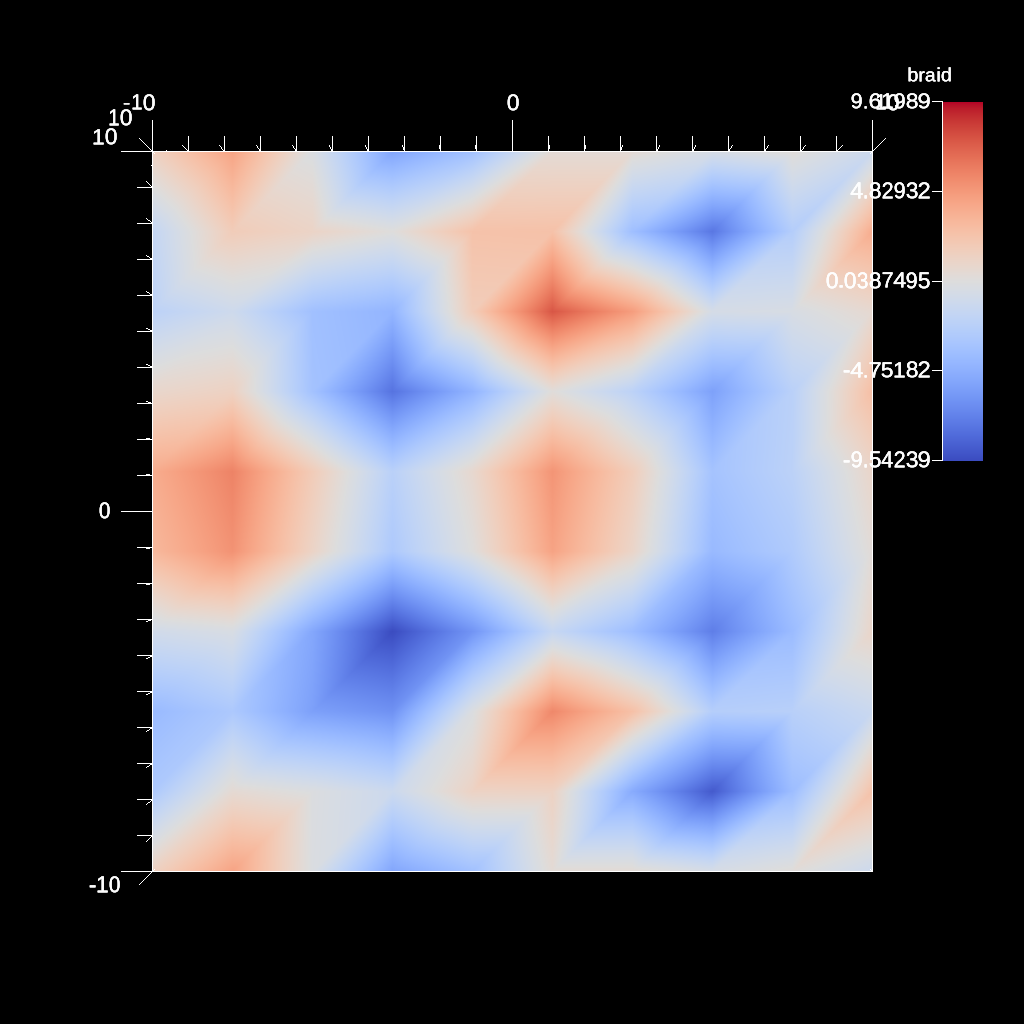

In [8]:
# show the resulting image
Image("out_ascent_render_3d.png",width=img_display_width)

### Three good changes to explore

- Data set dims
- Field and Plot Type
